In [100]:
import pandas as pd
########
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import accuracy_score, recall_score, precision_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_predict

from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings('ignore')


In [101]:
df = pd.read_csv('Covid_data.csv', sep=',')
df.head(3)

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494


In [102]:
df_ = df.drop(['iso_code','Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], axis = 1)
df_.head(2)

,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
0,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498
1,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498


In [103]:
df1 = df_.dropna(axis=0)
df1.head(2)

,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
0,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498
1,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498


# Non-transfromed Data
The gross domestic product (gdp per capita) indicates very low as the human development index very major percentage of it dispersed in the scale range of 0.4 to 1, and the cluster of data sets in the figure below has a downward parabolic curve.

<AxesSubplot:xlabel='gdp_per_capita', ylabel='human_development_index'>

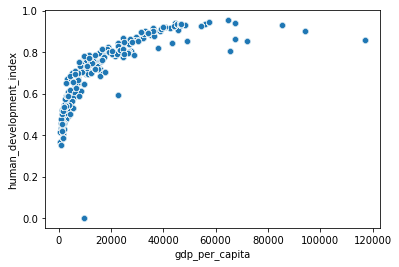

In [104]:
#px.scatter(df_, x="gdp_per_capita", y="human_development_index")
sns.scatterplot(data=df_, x="gdp_per_capita", y="human_development_index")


# Log-transformation

The target variable(features) in a log-level regression model is log-transformed, while the parameters are not. We must first exponentiate the coefficients of the variables before we can interpret the coefficients of a log-level regression.The data type in linear or regular form was skewed. 

The data from the plot above is significantly different because it is now linearly skewed as a result of the data transformation.

In [105]:
df1['gdp_per_capita']= df1['gdp_per_capita'].apply(lambda x: np.log(x + 1))
df1['total_deaths'] = df1['total_deaths'].apply(lambda x: np.log(x + 1))
df1['total_cases'] = df1['total_cases'].apply(lambda x: np.log(x + 1))

In [106]:
#px.scatter(df1, x="gdp_per_capita", y="human_development_index")

<AxesSubplot:xlabel='gdp_per_capita', ylabel='human_development_index'>

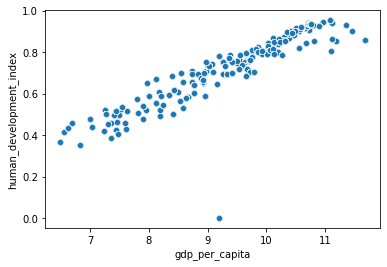

In [107]:
sns.scatterplot(data=df1, x="gdp_per_capita", y="human_development_index")

# dummy
constructs dummy variables with categorical features.

In [108]:
df2 = pd.get_dummies(df1,drop_first=True)
df2.head(2)

,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,location_Albania,location_Algeria,location_Angola,location_Argentina,...,date_2020-10-10,date_2020-10-11,date_2020-10-12,date_2020-10-13,date_2020-10-14,date_2020-10-15,date_2020-10-16,date_2020-10-17,date_2020-10-18,date_2020-10-19
0,0.0,0.0,0.0,38928341,7.498309,0.498,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,38928341,7.498309,0.498,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Normalize
Add a scaler to the data to normalize it. This demonstrates that each feature is processed evenly when in use.normalize the columns of total_cases, total_deaths, & gdp_per_capita.

In [109]:
scale = MinMaxScaler()
scaling = ['total_cases','total_deaths', 'gdp_per_capita']
scale_trans = pd.DataFrame(data = df1)
scale_trans[scaling] = scale.fit_transform(df1[scaling])
scale_trans.tail(3)

,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
50415,Zimbabwe,2020-10-17,0.567269,0.443642,76.85,14862927,0.203796,0.535
50416,Zimbabwe,2020-10-18,0.567354,0.443642,76.85,14862927,0.203796,0.535
50417,Zimbabwe,2020-10-19,0.567641,0.443642,76.85,14862927,0.203796,0.535


# Correlates 
Value is the proportion of a variable's variation between each features in the data set. The human development index has a 0.89 correlation with gdp per capita variables that indicates have linear relationship.Additionally, as the overall number of cases rises, so does the number of deaths, which is 0.92 & this also have positive relationship, research shows that when the number of cases rises, the death toll similarly rises. Nonetheless, there is a -0.008 correlation between the GDP and the population which is negative relationship.

In [110]:
df1.corr()

,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
total_cases,1.000000,0.921514,0.165891,0.229580,0.268451,0.270539
total_deaths,0.921514,1.000000,0.100190,0.263587,0.263967,0.276963
stringency_index,0.165891,0.100190,1.000000,0.087884,-0.065500,-0.088997
population,0.229580,0.263587,0.087884,1.000000,-0.008547,-0.009632
gdp_per_capita,0.268451,0.263967,-0.065500,-0.008547,1.000000,0.894158
human_development_index,0.270539,0.276963,-0.088997,-0.009632,0.894158,1.000000


# Map
The heatmap plot displaying additional data details of the data's interrelationships.

<AxesSubplot:>

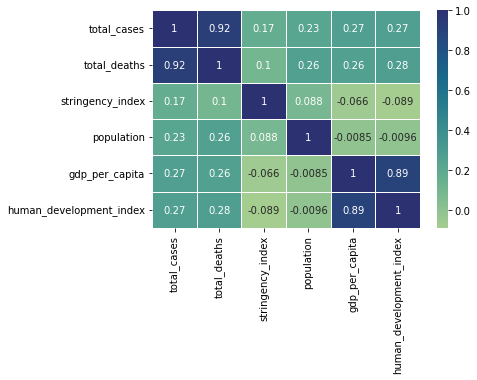

In [111]:
sns.heatmap(df1.corr(), 
            cmap='crest',
            annot=True,
            linewidth=0.5)

# Method
using Linear Regression, StandardScaler, Pipeline with split functions & k-fold method.
The k-fold cross validation method is used to evaluate how effectively the method performed on data.

In [112]:
#X = scale_trans.iloc[:, :-2].values
#y = df_.iloc[:, -1].values
X = scale_trans[['total_cases', 'total_deaths', 'stringency_index','population', 'human_development_index']]
y = scale_trans['gdp_per_capita']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state=42)

In [113]:
k_fold = KFold(shuffle=True, random_state=52518, n_splits=4)

# Variance & pipeline
Determines the percentage of the dependent variable's variance that the independent variable.
The variance scores of the variables exhibit fairly similar results to each other when using the Standard Scaler and Linear Regression, with values of 0.806 and 0.798, respectively.

In [114]:
#StandardScale with k-fold   
scale = StandardScaler()
linr = LinearRegression()

X_train_ = scale.fit_transform(X_train)
linr.fit(X_train_, y_train)
X_test = scale.transform(X_test)  
y_predict = linr.predict(X_test)
scale_score = r2_score(y_test.values, y_predict)
scale_score


0.8067369618805348

In [115]:
# regression with K-fold 
pipe = Pipeline([("scaler", scale),("regression", linr)])
predict_linr = cross_val_predict(pipe, X_train, y_train)
linr_score = r2_score(y_train, predict_linr)
linr_score

0.798358481673621

# Lasso
The lasso regression plot indicated a negative correlation between the variables' parameter values. This once again demonstrates that when alpha increases, model complexity decreases.

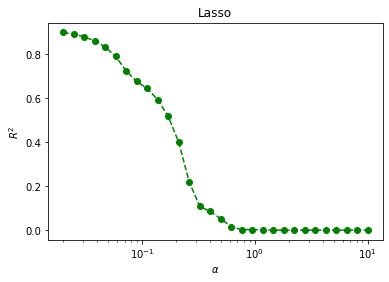

In [116]:
#lasso gives proper 
Poly = PolynomialFeatures(degree=5)
scores = []
alphas = np.geomspace(0.02, 10.0, 30)
predict_lasso = []
for alpha in alphas:
    las_alpha = Lasso(alpha=alpha, max_iter=10000)
    
    Pipe = Pipeline([("scaler", scale), ("feature", Poly), ("lasso", las_alpha)])

    predict_lasso = cross_val_predict(Pipe, X_train, y_train)
    
    r_2_s = r2_score(y_train, predict_lasso)
    
    scores.append(r_2_s)
plt.semilogx(alphas, scores, '--o', color='green')
plt.title('Lasso')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [117]:
r_2_s

-3.99499162431205e-05

# Conclusion
Due to pandamic, the provided data cannot accurately reflect the global market's true impact. Due to a lack of equipment in some developing countries, there aren't enough cases to report. On the other hand, developed nations have sufficient testing facilities and offer more cases for both testing and showing.
Perhaps gathering more frequent data on specific countries might help to produce more precise results when predicting the impact on GDP for a particular country.